# Berlin Crime Data Analysis

## Aim of the project
- This project aims to analyse crime data in **Berlin, Germany** between the years **2012 - 2019**

## Source
- In this project, I have used a dataset from [Kaggle](https://www.kaggle.com/datasets/danilzyryanov/crime-in-berlin-2012-2019)

## Questions to be answered about the dataset
- Which neighbourhoods of Berlin have a higher number of reported crimes?
- What are the most frequent crimes by neighbourhood?
- What are the general trends in the reported crimes from 2012 - 2019?

## Table of content
1. Installing & importing the necessary libraries
2. Reading & exploring the data
3. Data cleaning & pre-processing
4. Data analysis & visualization
5. Conclusion about the dataset

### Installing & importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="darkgrid", palette="viridis", font = 'Times New Roman', font_scale = 1.5)

### Reading & exploring the data

In [3]:
data = pd.read_csv('./Berlin_crimes.csv')

In [4]:
data.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1200 non-null   int64 
 1   District        1200 non-null   object
 2   Code            1200 non-null   int64 
 3   Location        1200 non-null   object
 4   Robbery         1200 non-null   int64 
 5   Street_robbery  1200 non-null   int64 
 6   Injury          1200 non-null   int64 
 7   Agg_assault     1200 non-null   int64 
 8   Threat          1200 non-null   int64 
 9   Theft           1200 non-null   int64 
 10  Car             1200 non-null   int64 
 11  From_car        1200 non-null   int64 
 12  Bike            1200 non-null   int64 
 13  Burglary        1200 non-null   int64 
 14  Fire            1200 non-null   int64 
 15  Arson           1200 non-null   int64 
 16  Damage          1200 non-null   int64 
 17  Graffiti        1200 non-null   int64 
 18  Drugs   

There are 20 Columns and 1200 Rows. The dataset contains a mixture of integer and string type data

### Data cleaning & pre-processing

In [6]:
data.isna().sum()

Year              0
District          0
Code              0
Location          0
Robbery           0
Street_robbery    0
Injury            0
Agg_assault       0
Threat            0
Theft             0
Car               0
From_car          0
Bike              0
Burglary          0
Fire              0
Arson             0
Damage            0
Graffiti          0
Drugs             0
Local             0
dtype: int64

There are no null values in the dataset that need to be cleaned

In [7]:
data[data.duplicated()]

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local


There are no duplicates in the dataset

In [8]:
data.columns

Index(['Year', 'District', 'Code', 'Location', 'Robbery', 'Street_robbery',
       'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike',
       'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local'],
      dtype='object')

In [9]:
data.columns = data.columns.str.lower()

Making the names of the columns be in lower case makes it easier to work with them later on

In [10]:
data.rename(columns={'location': 'neighbourhood',
                     'robbery': 'robbery_out_of_street',
                     'street_robbery': 'robbery_on_street',
                     'threat' : 'victims_of_threats', 
                     'car': 'car_theft',
                     'from_car': 'theft_from_car',
                     'bike': 'bike_theft',
                     'fire': 'fire_without_intent',
                     'damage': 'property_damage',
                     'local': 'kieztaten'}, inplace=True)

The names of some of the columns have been changed to better describe the data they contain. The explanations of what these columns represent were gotten from the original kaggle source. The column 'local' has been changed to 'kieztaten', which is a German word. Kieztaten means crimes that are comitted close to the living place of the criminal the column 'fire_without_intent' represents crimes where fire was used to commit damage without any intention. The column 'agg_assault' represents reported cases of aggrevated assault

In [11]:
data.head()

,year,district,code,neighbourhood,robbery_out_of_street,robbery_on_street,injury,agg_assault,victims_of_threats,theft,car_theft,theft_from_car,bike_theft,burglary,fire_without_intent,arson,property_damage,graffiti,drugs,kieztaten
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


### Data analysis & visualization

#### 1. Which neighbourhoods have the highest number of reported crimes?

In order to get an idea of the highest number of reported crimes, it is necessary to first know the total number of crimes reported for each nighbourhood. Therefore, I am now creating a new column called total_crimes that will have the sum of all the different types of crimes reported for each neighbhourhood for each year between 2012-2019.

In [12]:
data['total_crimes'] = data.iloc[:, 4:18].sum(axis=1)

Here, I have selected the columns 4 - 18, columns are zero indexed, because these are the columns reporting on the different crime types. Then i have summed up the numbers for each row and represented the sum in the new column. It is important to note that column 19, 'kieztaten', is not representing a type of crime, rather whether or not the crime was comitted near the place of residence of the criminal.

In [13]:
data.head()

,year,district,code,neighbourhood,robbery_out_of_street,robbery_on_street,injury,agg_assault,victims_of_threats,theft,...,theft_from_car,bike_theft,burglary,fire_without_intent,arson,property_damage,graffiti,drugs,kieztaten,total_crimes
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,...,328,120,68,16,4,273,26,171,1032,4130
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,...,307,170,37,10,4,380,124,98,870,5078
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,...,792,822,275,49,27,1538,522,435,3108,15771
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,...,192,396,131,14,5,428,122,213,752,3747
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,...,410,325,161,42,22,516,64,259,1403,5298


As we can see above, the new column has been created. Now my aim is to group the data by each year and show the neighbourhoods with the top 5 highest number of reported crimes.

In [14]:
data_copy = data.copy()

I have just created a copy of the dataframe, "data". As can be seen later on in the project, the dataframe will be altered, and since this current form of the dataframe will function as the main building block for this project, it is always a good idea to create a copy of it, in case it is needed afterwards.

In [15]:
top_5_crimes = data.groupby('year').apply(lambda x: x.nlargest(5, 'total_crimes'))[['year', 'neighbourhood', 'total_crimes']]
top_5_crimes.reset_index(drop=True, inplace=True)

top_5_crimes

,year,neighbourhood,total_crimes
0,2012,Alexanderplatz,15771
1,2012,Tempelhofer Vorstadt,10061
2,2012,Wedding Zentrum,7779
3,2012,Frankfurter Allee Süd FK,7775
4,2012,Schöneberg-Nord,7748
5,2013,Alexanderplatz,16548
6,2013,Tempelhofer Vorstadt,9788
7,2013,Frankfurter Allee Süd FK,8522
8,2013,Schöneberg-Nord,8240
9,2013,Wedding Zentrum,7637


Above, I have created a new dataframe, grouped the data by the years, applied a function using lambda to find the top 5 highest values of total_crimes, and selected the year, neighbourhood and total_crimes columns to show.

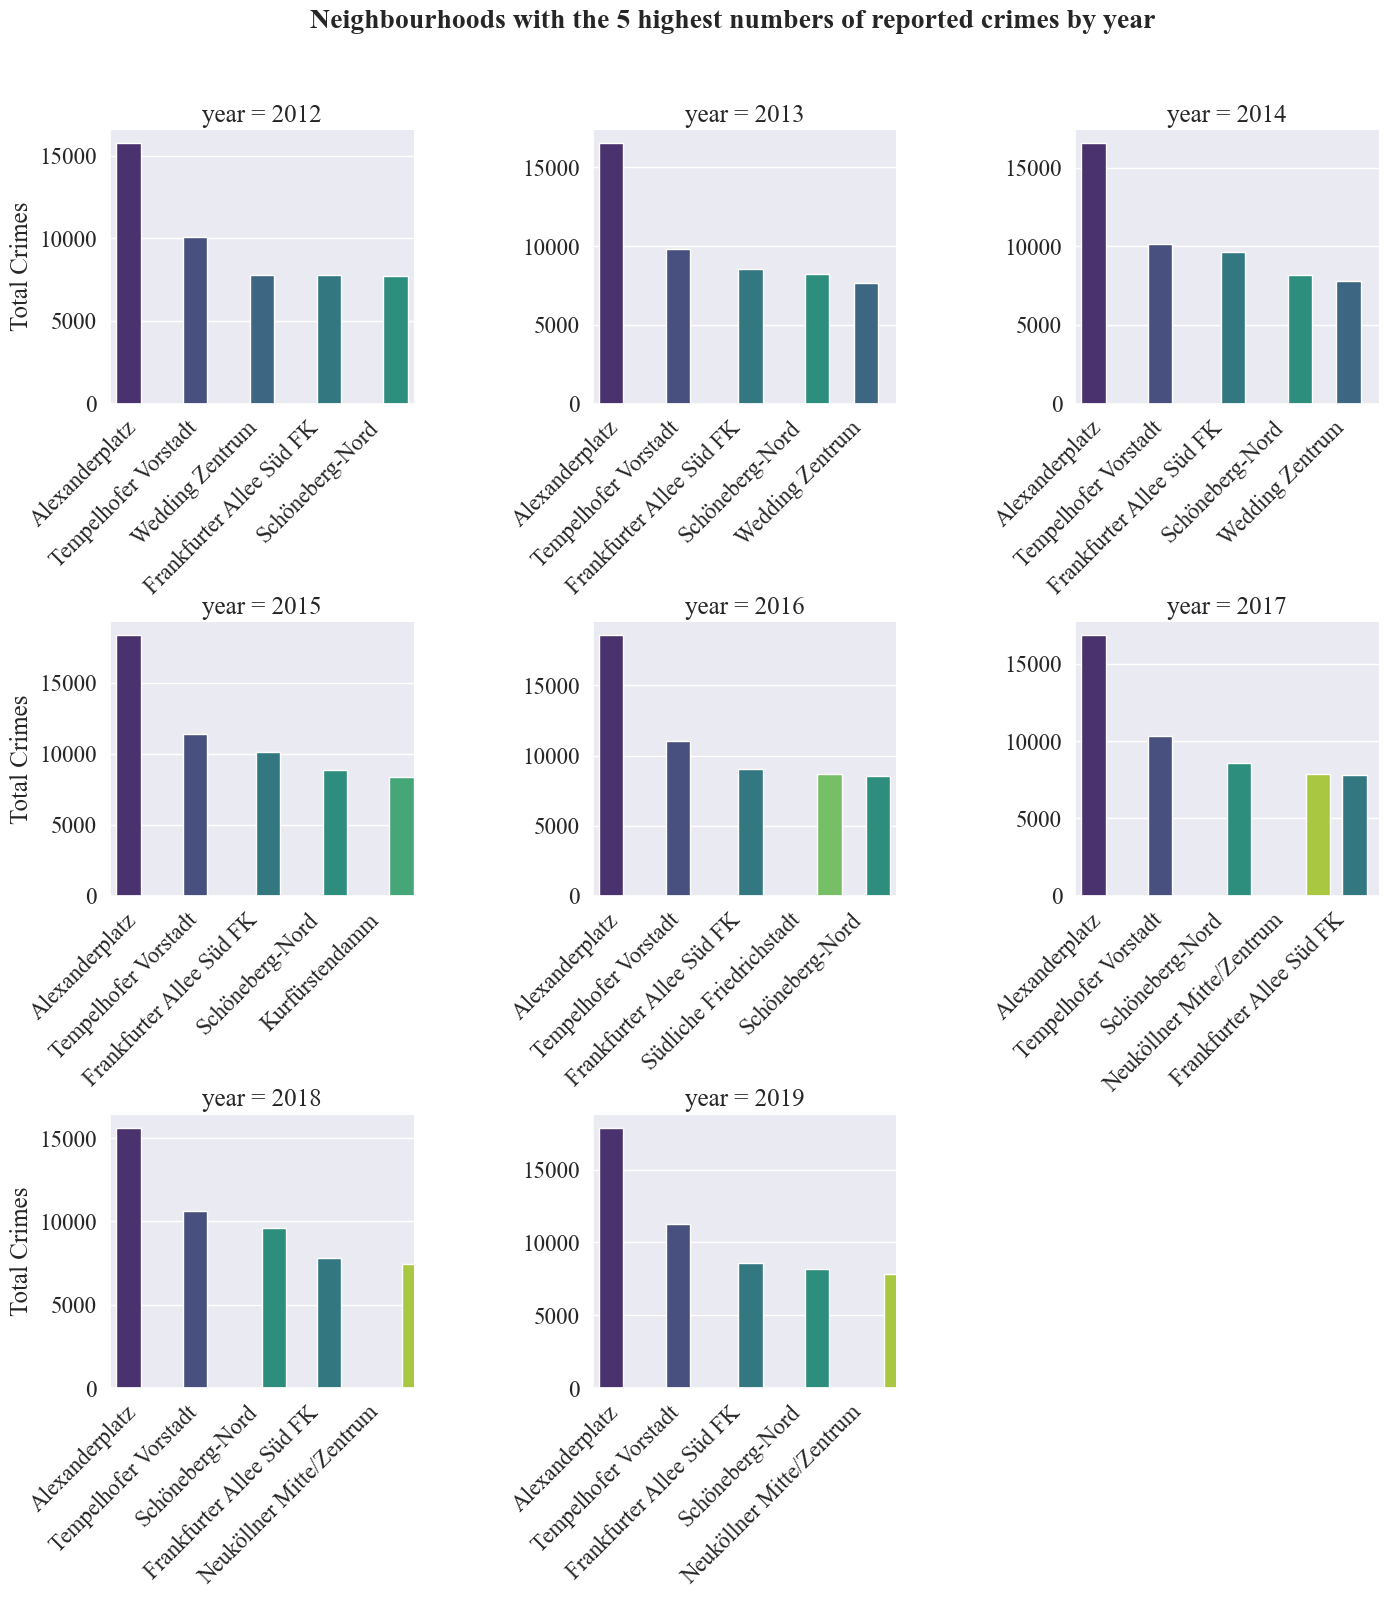

In [16]:
plot1 = sns.catplot(data=top_5_crimes, x='neighbourhood', y='total_crimes', kind='bar',col='year', hue = 'neighbourhood', col_wrap=3, palette="viridis", sharey=False, sharex=False)
plot1.set_xticklabels(rotation=45, ha='right')
plot1.set_xlabels("")
plot1.set_ylabels("Total Crimes")
plt.subplots_adjust(top=0.9, hspace=0.8)
plt.suptitle('Neighbourhoods with the 5 highest numbers of reported crimes by year', fontsize=20, fontweight='bold')
for ax in plot1.axes.flat:
    for bar in ax.patches:
        bar.set_width(0.4)
plt.show()

Above, I have created a plot with 8 subplots for each year in this dataset using sns catplot. The subplots show which neighbourhoods had the highest number of reported crimes for each year. Due the the large number of subplots and the names of the neighbourhoods, the subplots had to be adjusted to ensure the information was comprehensible. This can be seen in the code above.

##### Noteworthy obeservations

- The neighbourhood of Alexanderplatz has consistently been the place of the highest number of  reported crimes over the years, the number of reported crimes being significantly higher than other neighbourhoods
- The neighbourhoods Tempelhofer vorstadt, Frankfurter Allee Süd FK and Schöneberg Nord have also featured in the top 5 areas in terms of reported crimes in different order over the years
- Wedding Zentrum is a neighbourhood that appeared in the plots between the years of 2012 - 2014, after which it wasn't in the top 5 anymore
- Neuköllner Mitte/Zentrum is a neighbourhood that started appearing consistently in the plots from 2017 onwards

#### 2. What are the most frequent crimes by neighbourhood?

My aim for this section is to determine what the most frequent crimes are in the neighbourhoods with the highest numbers of reported crimes. In order to do that, I first start by creating a new dataframe group by the years and consisting of the top 3 neighbourhoods in terms of total crimes, total crimes itself, and the different types of crimes recorded in this dataset. This is shown below.

In [17]:
top_3_crimes_distribution = data.groupby('year').apply(lambda x: x.nlargest(3, 'total_crimes'))[[
  'year', 
  'neighbourhood', 
  'total_crimes',
  'robbery_out_of_street',
  'robbery_on_street',
  'injury',
  'agg_assault',
  'victims_of_threats',
  'theft',
  'car_theft',
  'theft_from_car',
  'bike_theft',
  'burglary',
  'fire_without_intent',
  'arson',
  'property_damage',
  'graffiti',
  'drugs']]
top_3_crimes_distribution.reset_index(drop=True, inplace=True)

top_3_crimes_distribution

,year,neighbourhood,total_crimes,robbery_out_of_street,robbery_on_street,injury,agg_assault,victims_of_threats,theft,car_theft,theft_from_car,bike_theft,burglary,fire_without_intent,arson,property_damage,graffiti,drugs
0,2012,Alexanderplatz,15771,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435
1,2012,Tempelhofer Vorstadt,10061,180,88,932,274,241,5170,90,595,913,390,58,21,915,194,397
2,2012,Wedding Zentrum,7779,216,104,1210,426,384,3396,57,424,294,298,54,23,806,87,570
3,2013,Alexanderplatz,16548,237,149,1442,354,333,10165,85,760,926,281,47,20,1301,448,590
4,2013,Tempelhofer Vorstadt,9788,143,81,869,242,282,5097,142,618,935,338,35,14,805,187,352
5,2013,Frankfurter Allee Süd FK,8522,124,80,897,297,156,4070,96,333,660,144,61,26,1270,308,468
6,2014,Alexanderplatz,16578,203,106,1309,364,350,10510,89,710,1074,241,46,18,1207,351,506
7,2014,Tempelhofer Vorstadt,10180,128,60,986,264,262,5460,97,545,1010,230,54,18,854,212,226
8,2014,Frankfurter Allee Süd FK,9656,162,116,880,287,163,5162,71,358,849,143,44,19,1184,218,665
9,2015,Alexanderplatz,18337,157,90,1440,408,320,12150,83,820,1082,236,35,12,1171,333,499


Now for my next step, I chose is to slice the dataframe above into 8 different new dataframes, one for each year, as this will make my task of analysing the distribution of crimes in the neighbourhoods easier. I created a "for" loop to do this, as it helps me avoid the repetitiveness of having to write the same code for each year. I also dropped the year column as the dataframes are already divided into the different years.

In [18]:
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
data_by_year = {}
for year in years:
    data = top_3_crimes_distribution[top_3_crimes_distribution['year'] == year]
    data = data.reset_index(drop=True).drop('year', axis=1)
    data_by_year[year] = data

In [19]:
data_by_year[2012]

,neighbourhood,total_crimes,robbery_out_of_street,robbery_on_street,injury,agg_assault,victims_of_threats,theft,car_theft,theft_from_car,bike_theft,burglary,fire_without_intent,arson,property_damage,graffiti,drugs
0,Alexanderplatz,15771,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435
1,Tempelhofer Vorstadt,10061,180,88,932,274,241,5170,90,595,913,390,58,21,915,194,397
2,Wedding Zentrum,7779,216,104,1210,426,384,3396,57,424,294,298,54,23,806,87,570


Now that I have my different dataframes ready, I can start visualizing the data. The code used for this can be seen below. I am creating a grouped bar plot. The x-axis is showing the top 3 neighbourhoods in terms of reported crimes for each year and the y-axis is a count of how often each crime was comitted. Each bar for each neighbourhood represents a different crime. Once again, I used a "for" loop for this purpose as it allows me to only write the code once and apply it for each year. I have also defined a function that allows me to call upon the plot for each year seperately, as this will help space out the plots and make them easier to comprehend.

In [20]:
years_to_plot = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

def plot_crime_distribution(year):
    neighborhoods = data_by_year[year]['neighbourhood']
    crime_columns = data_by_year[year].columns[2:]
    index = np.arange(len(neighborhoods))
    
    bottom = np.zeros(len(neighborhoods))
    
    plt.figure(figsize=(28, 14))
    
    bar_width = 0.2
    index_shift = np.arange(len(neighborhoods)) * 3.8
    
    for i, crime in enumerate(crime_columns):
        x = index_shift + i * bar_width 
        y = data_by_year[year][crime]
        
        plt.bar(x, y, width=bar_width, label=crime)
    
    plt.xticks(index_shift + bar_width * (len(crime_columns) - 1) / 2, neighborhoods, fontsize=30)
    plt.xlabel('')
    plt.yticks(fontsize=30)
    plt.ylabel('Count', fontsize=30)
    plt.title(f'Crime distribution in the neighbourhoods with the top 3 most reported crimes ({year})', fontsize=32, fontweight='bold')
    plt.legend(loc='upper right', title='Crime Types', fontsize=22, title_fontsize=28, labelspacing=1)
    plt.tight_layout()

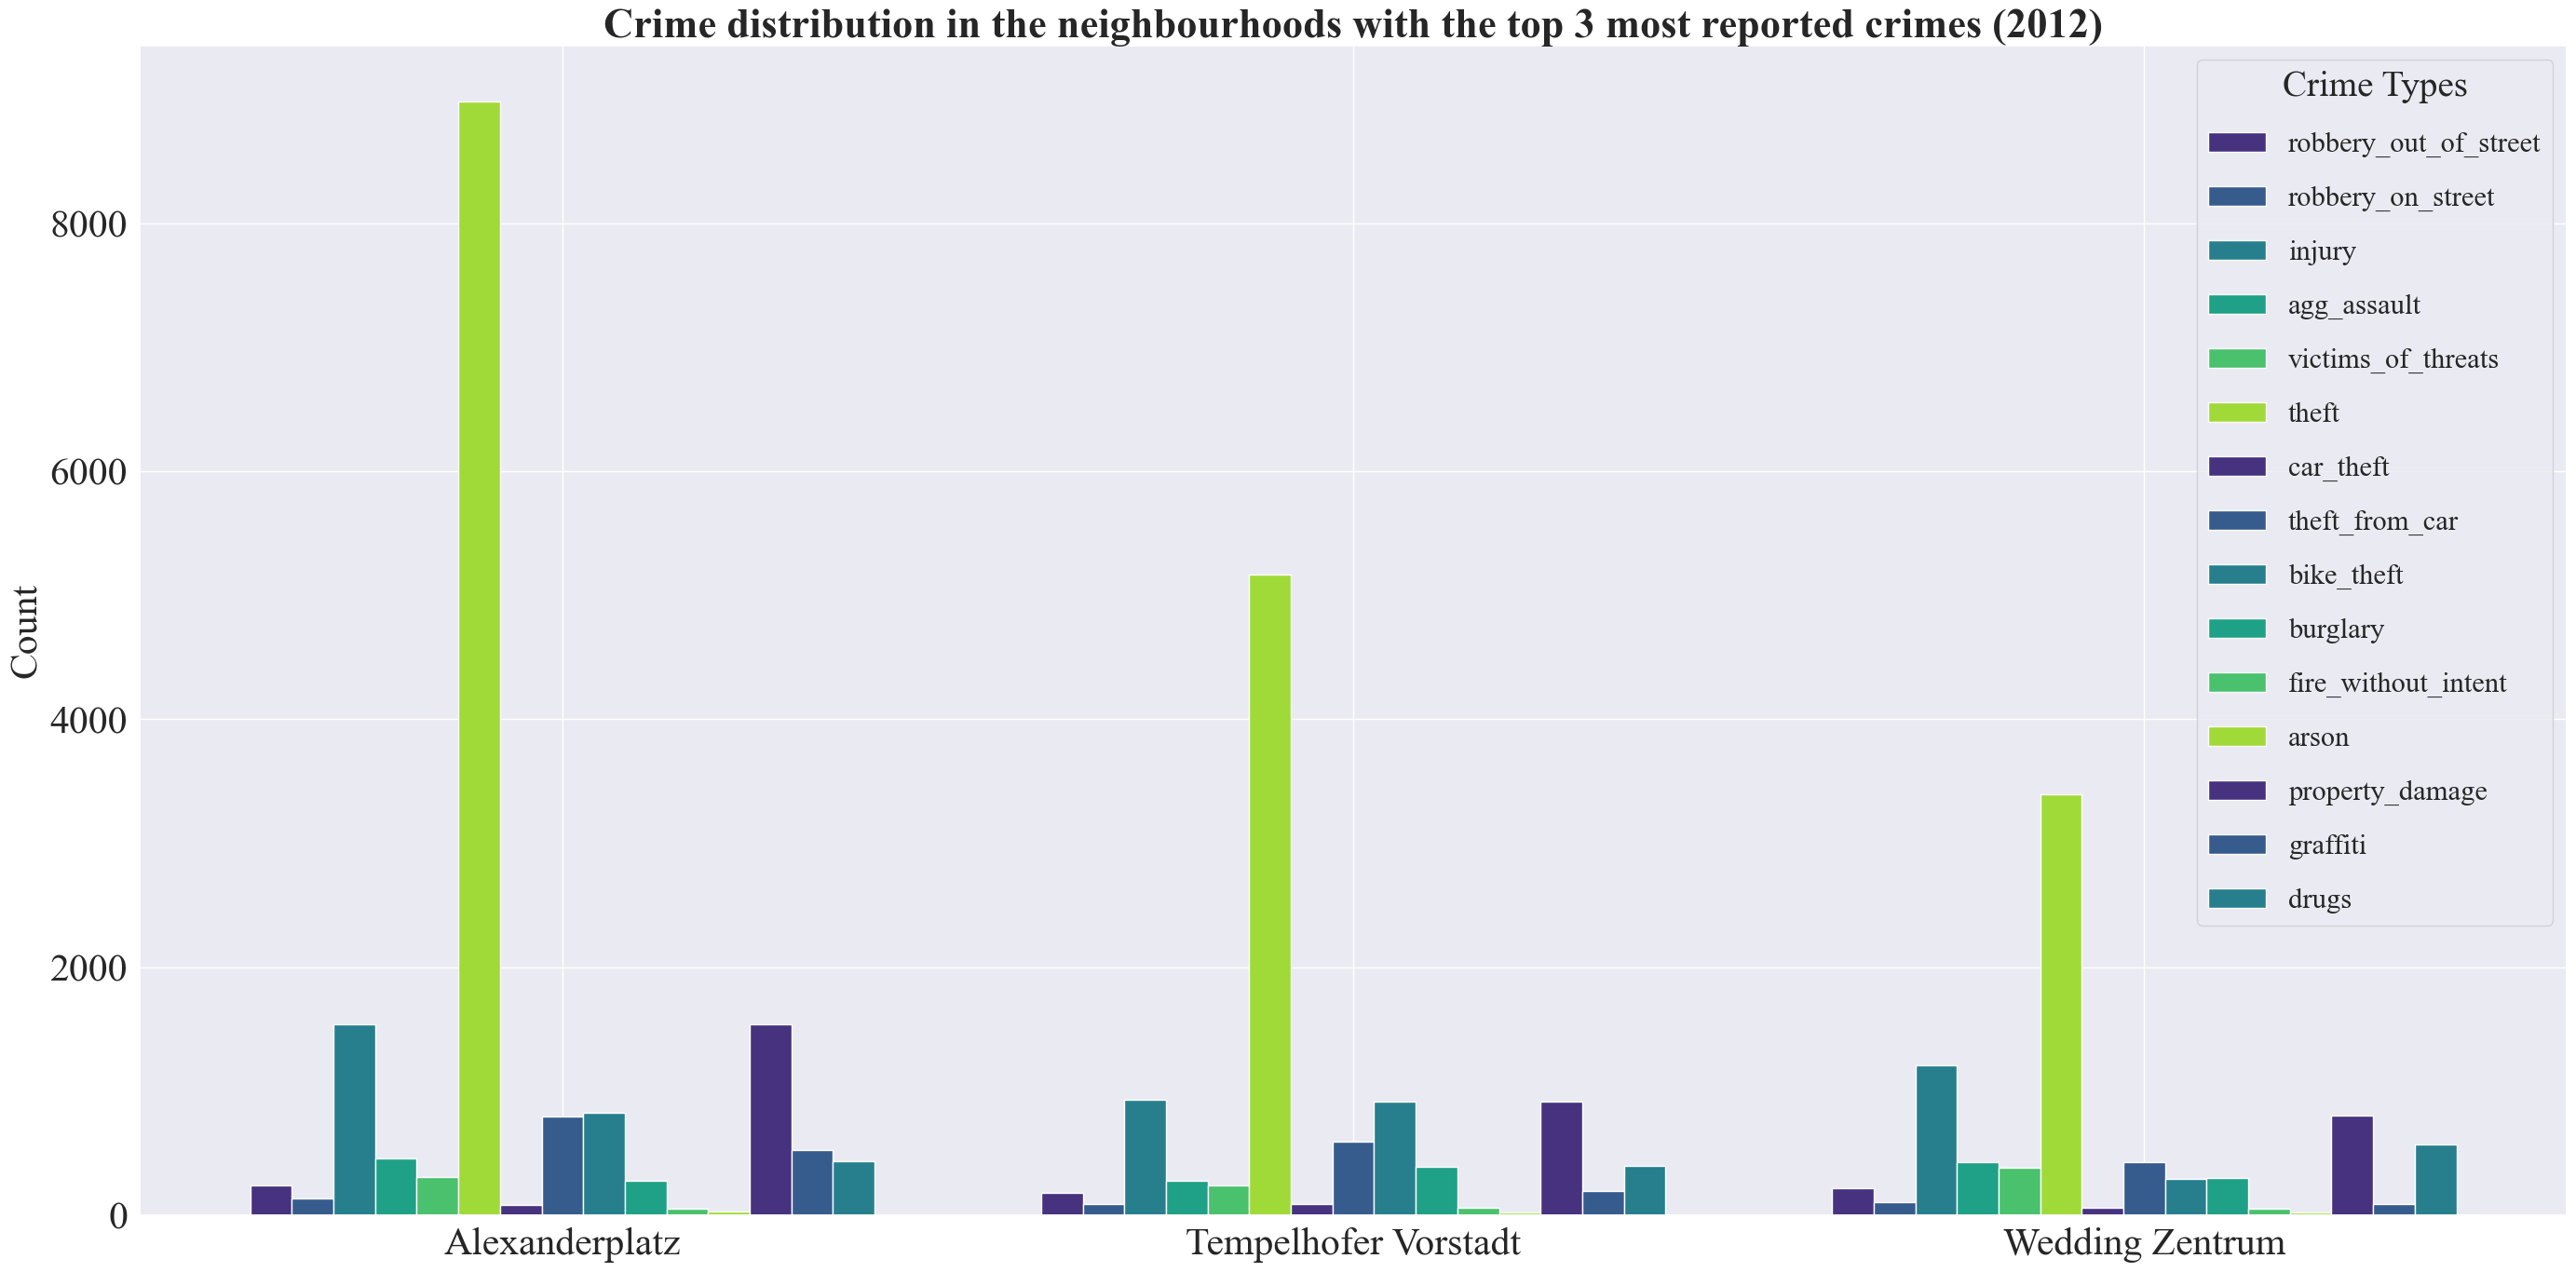

In [21]:
plot_crime_distribution(2012)
plt.show()

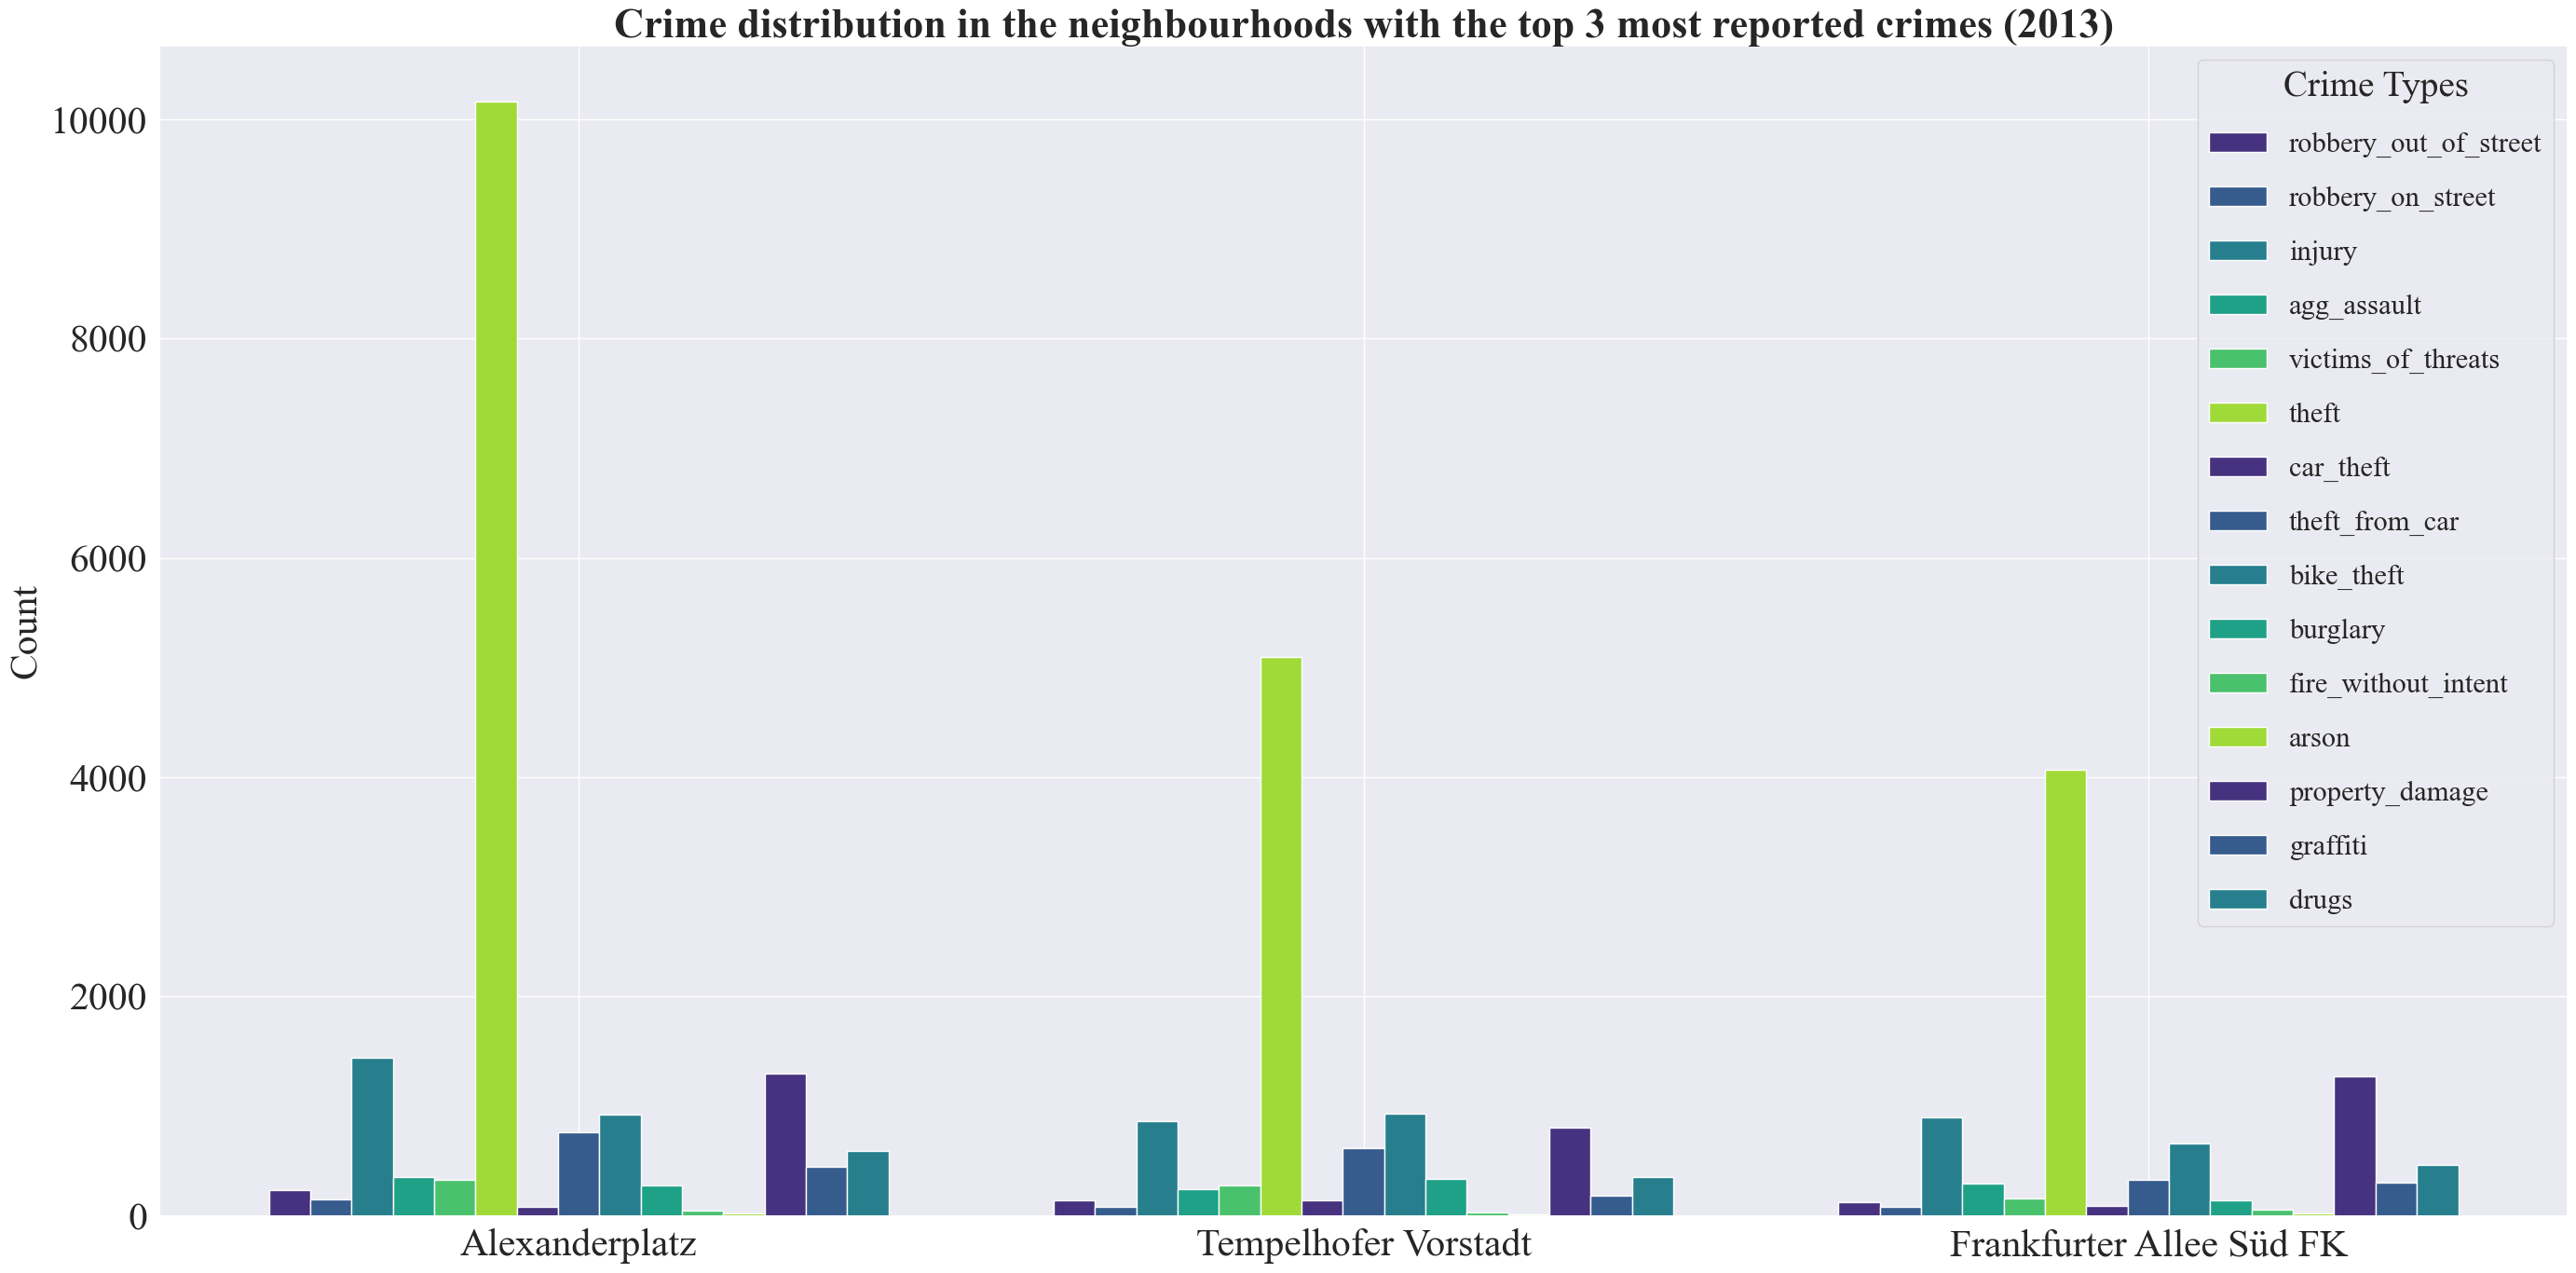

In [22]:
plot_crime_distribution(2013)
plt.show()

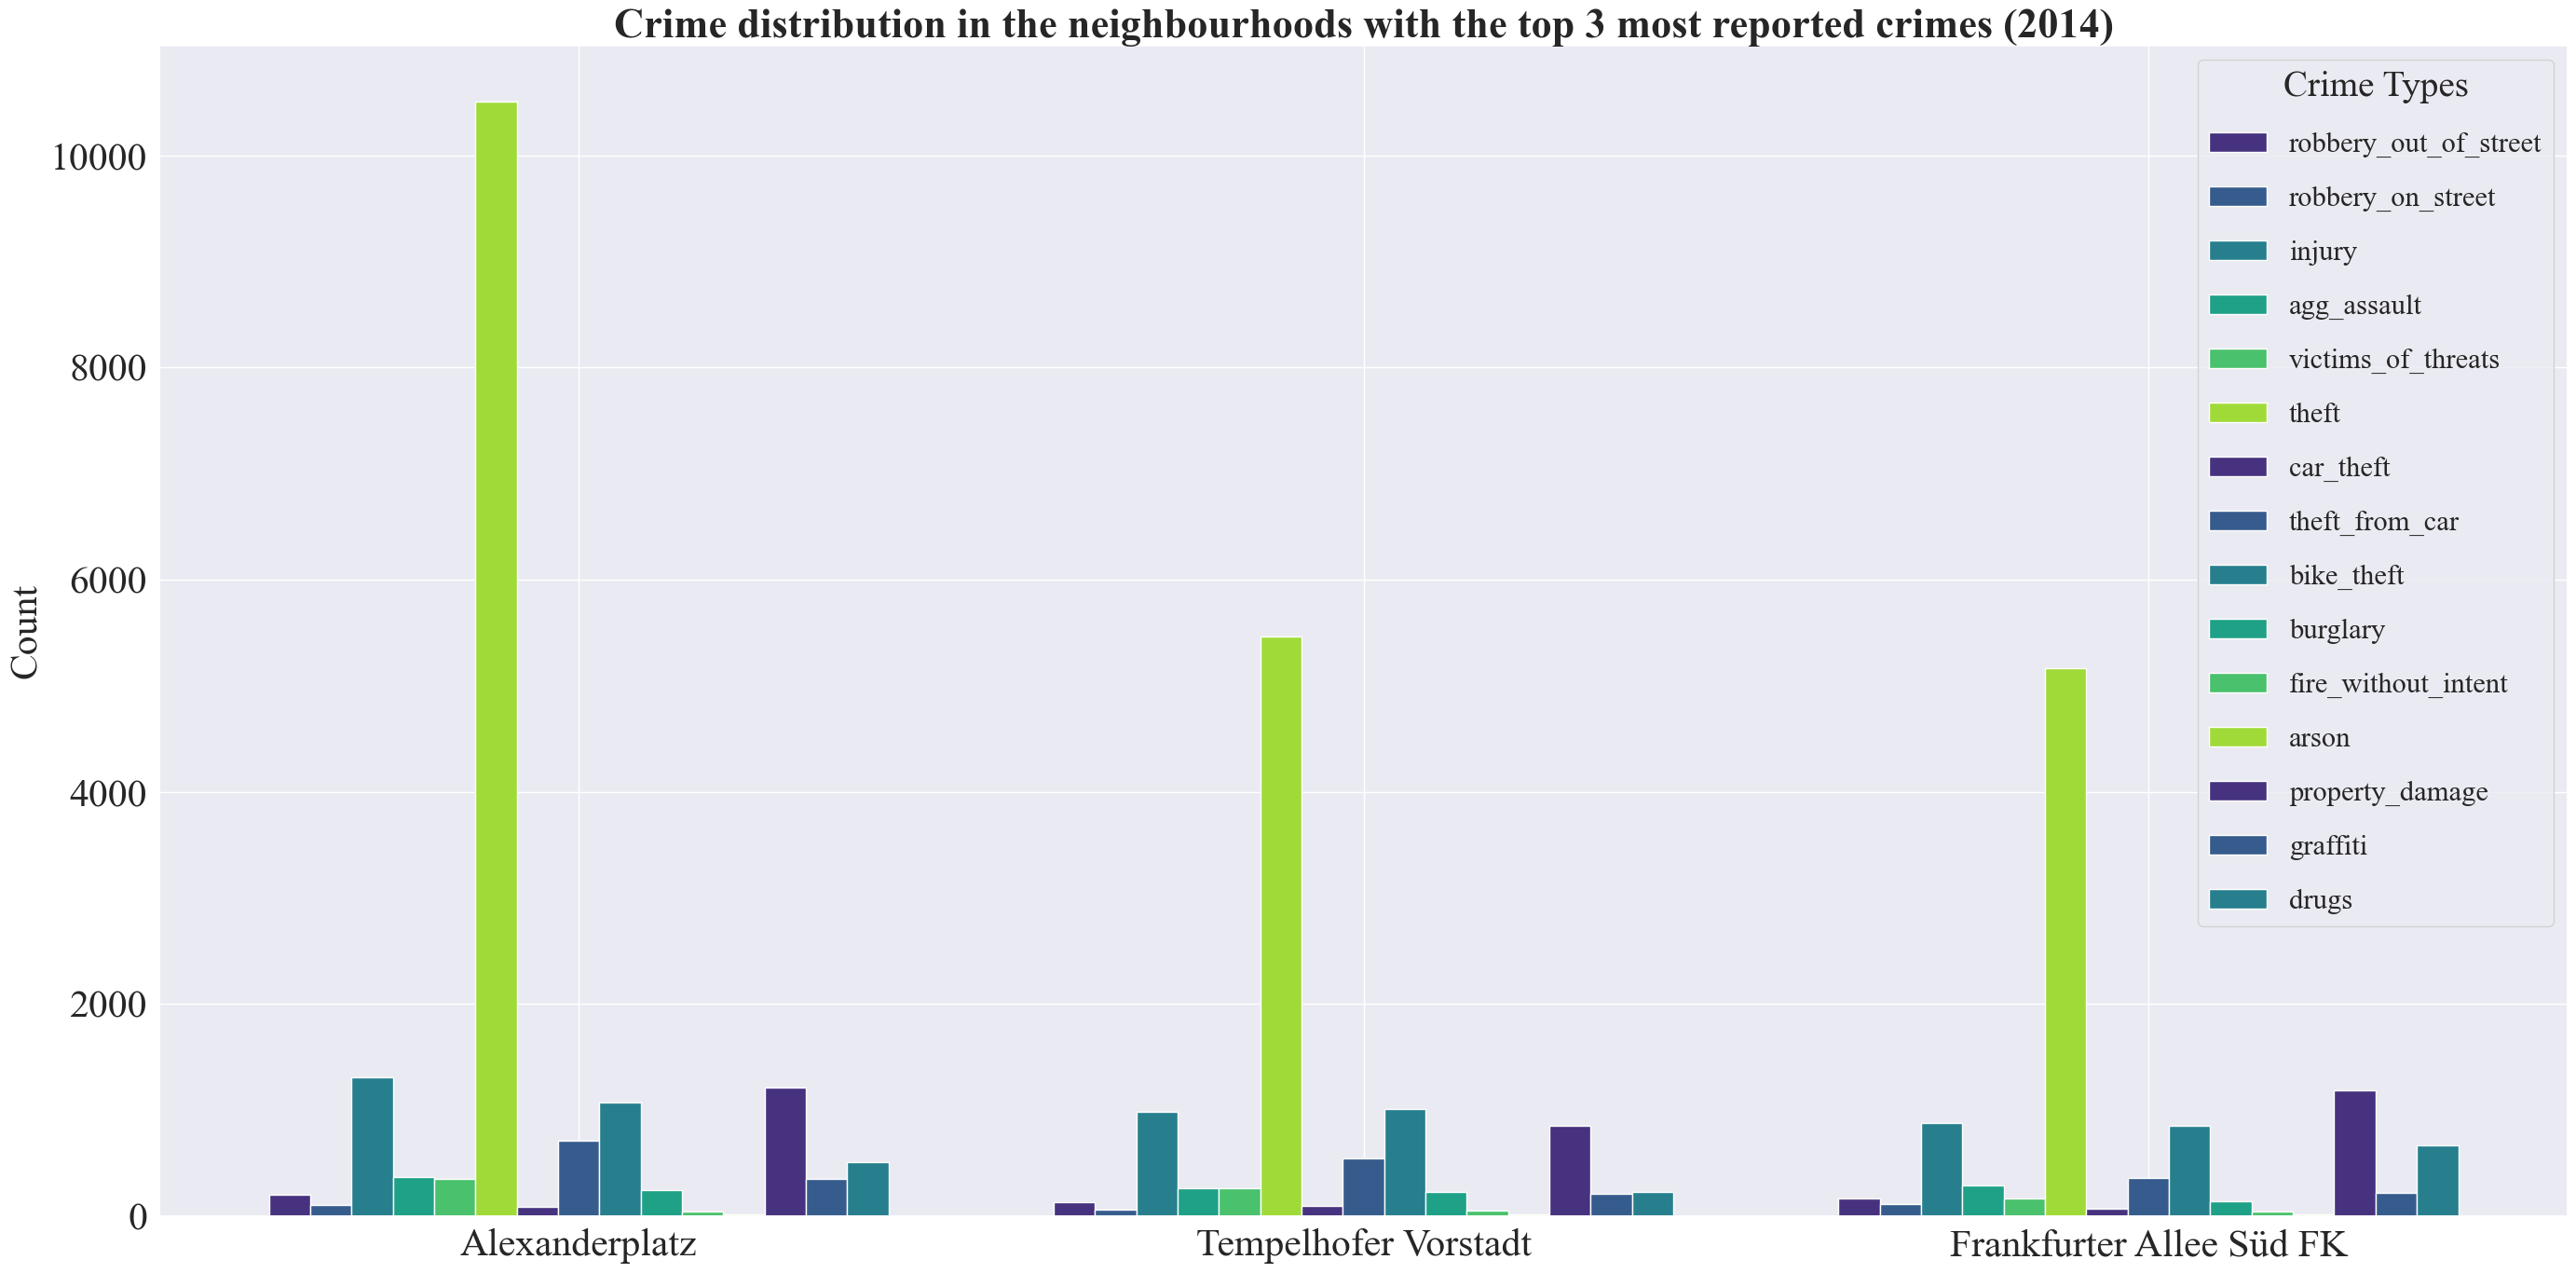

In [23]:
plot_crime_distribution(2014)
plt.show()

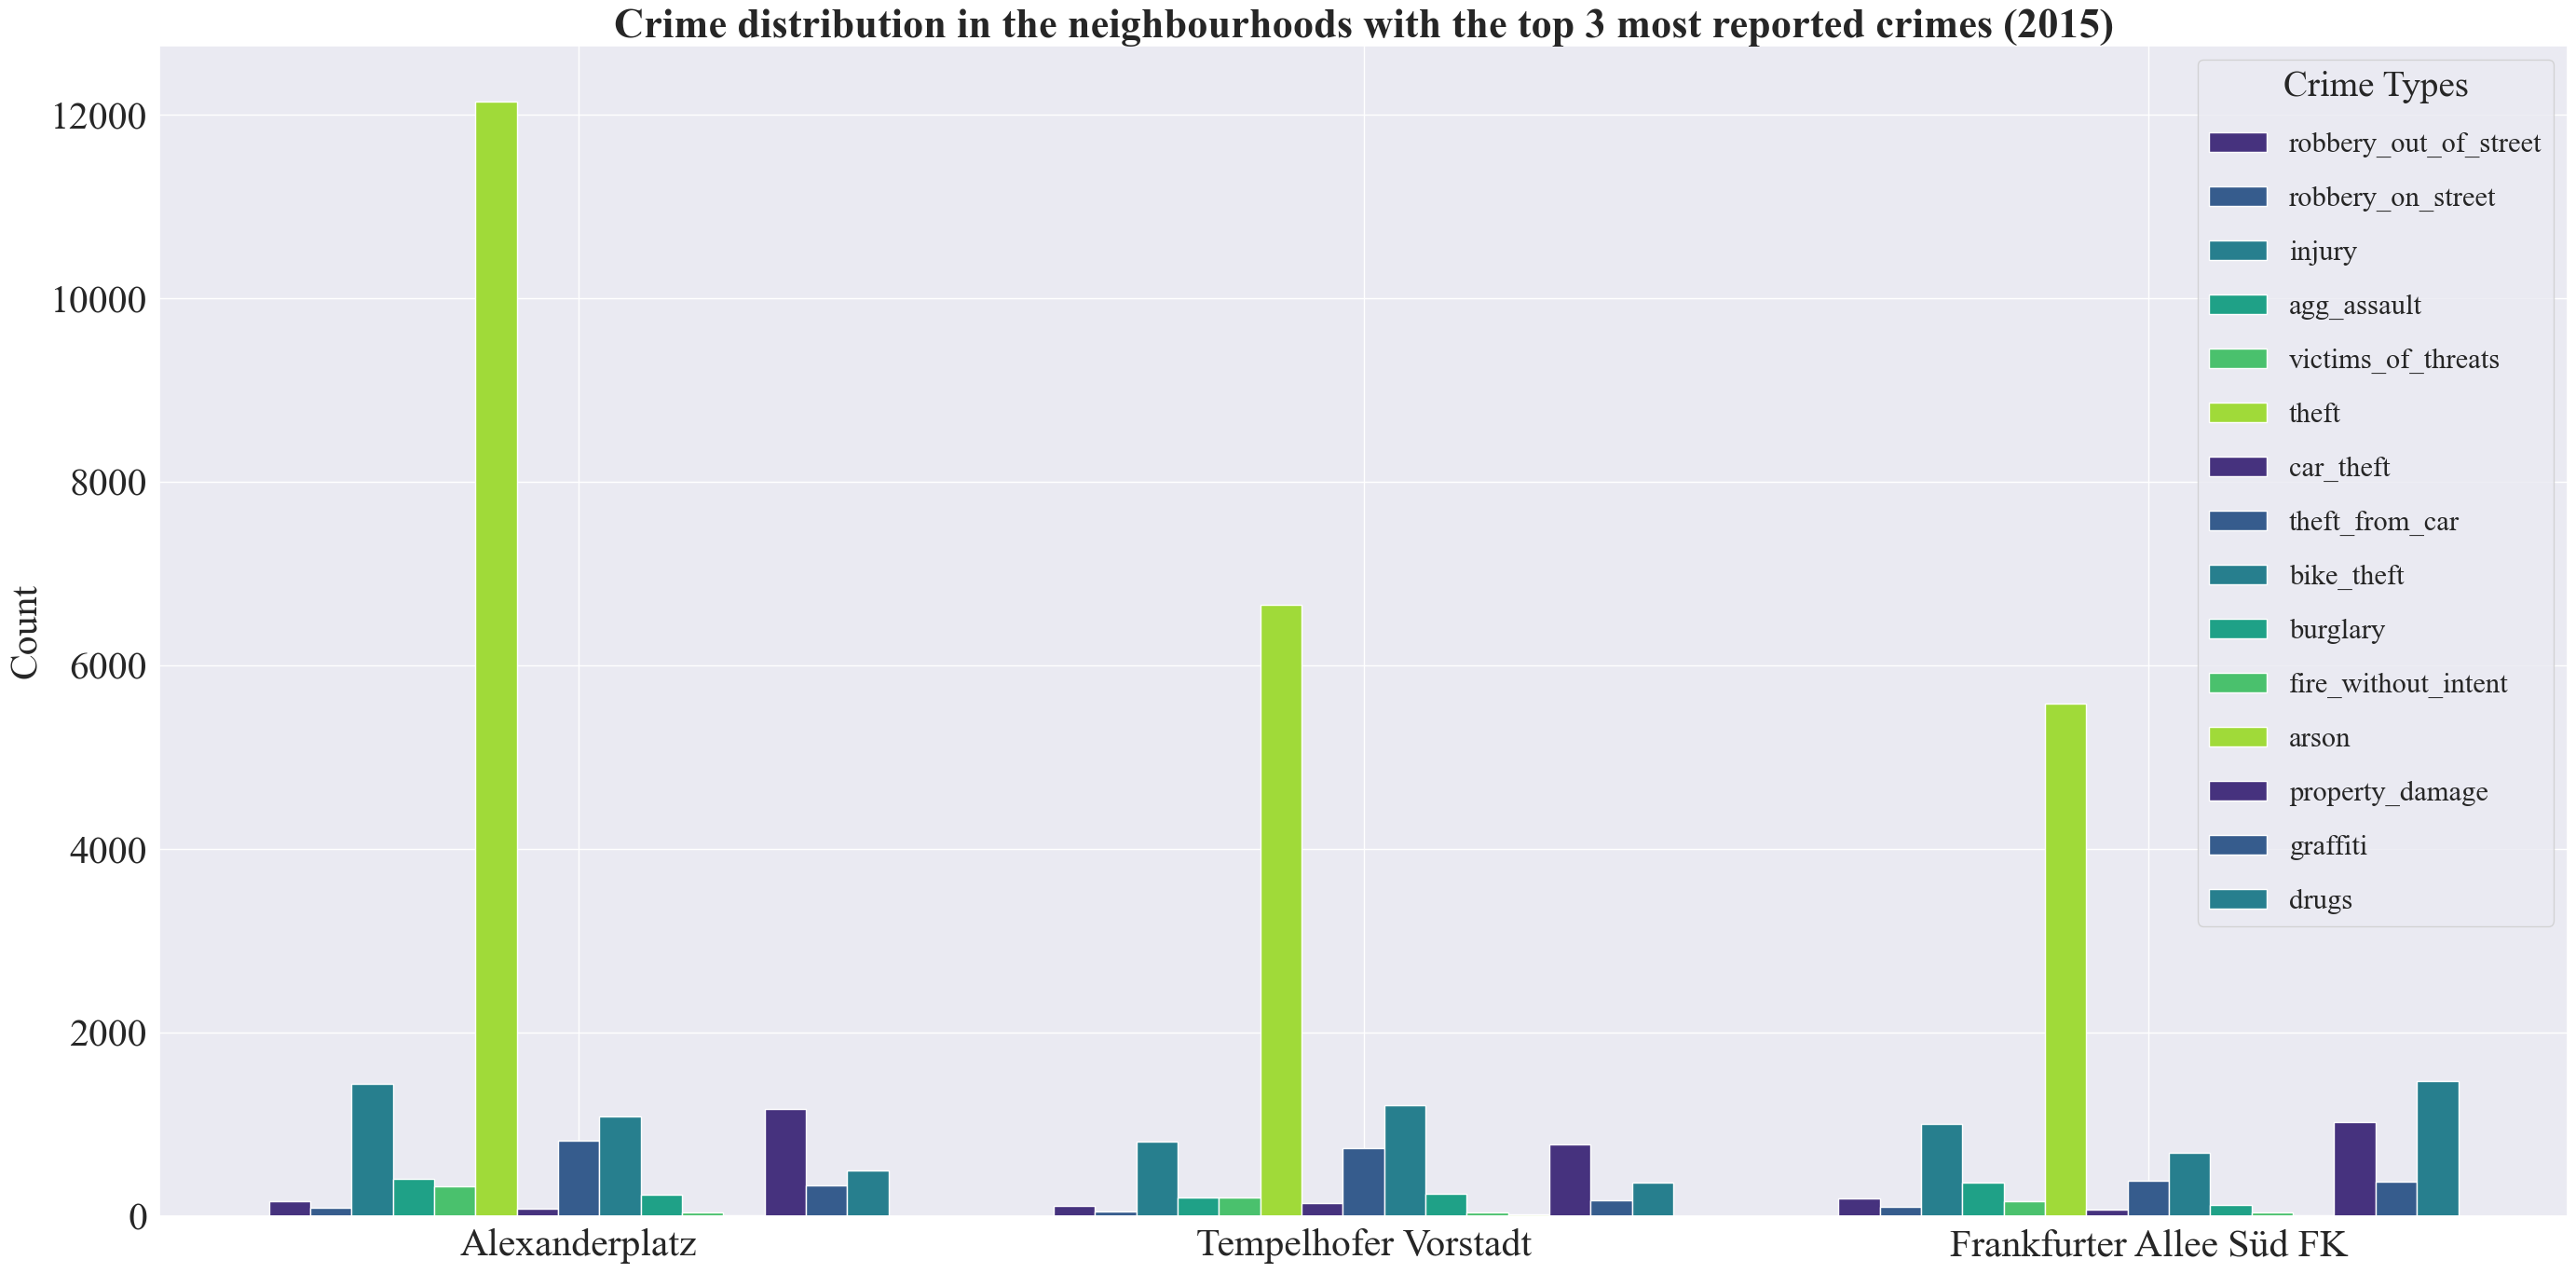

In [24]:
plot_crime_distribution(2015)
plt.show()

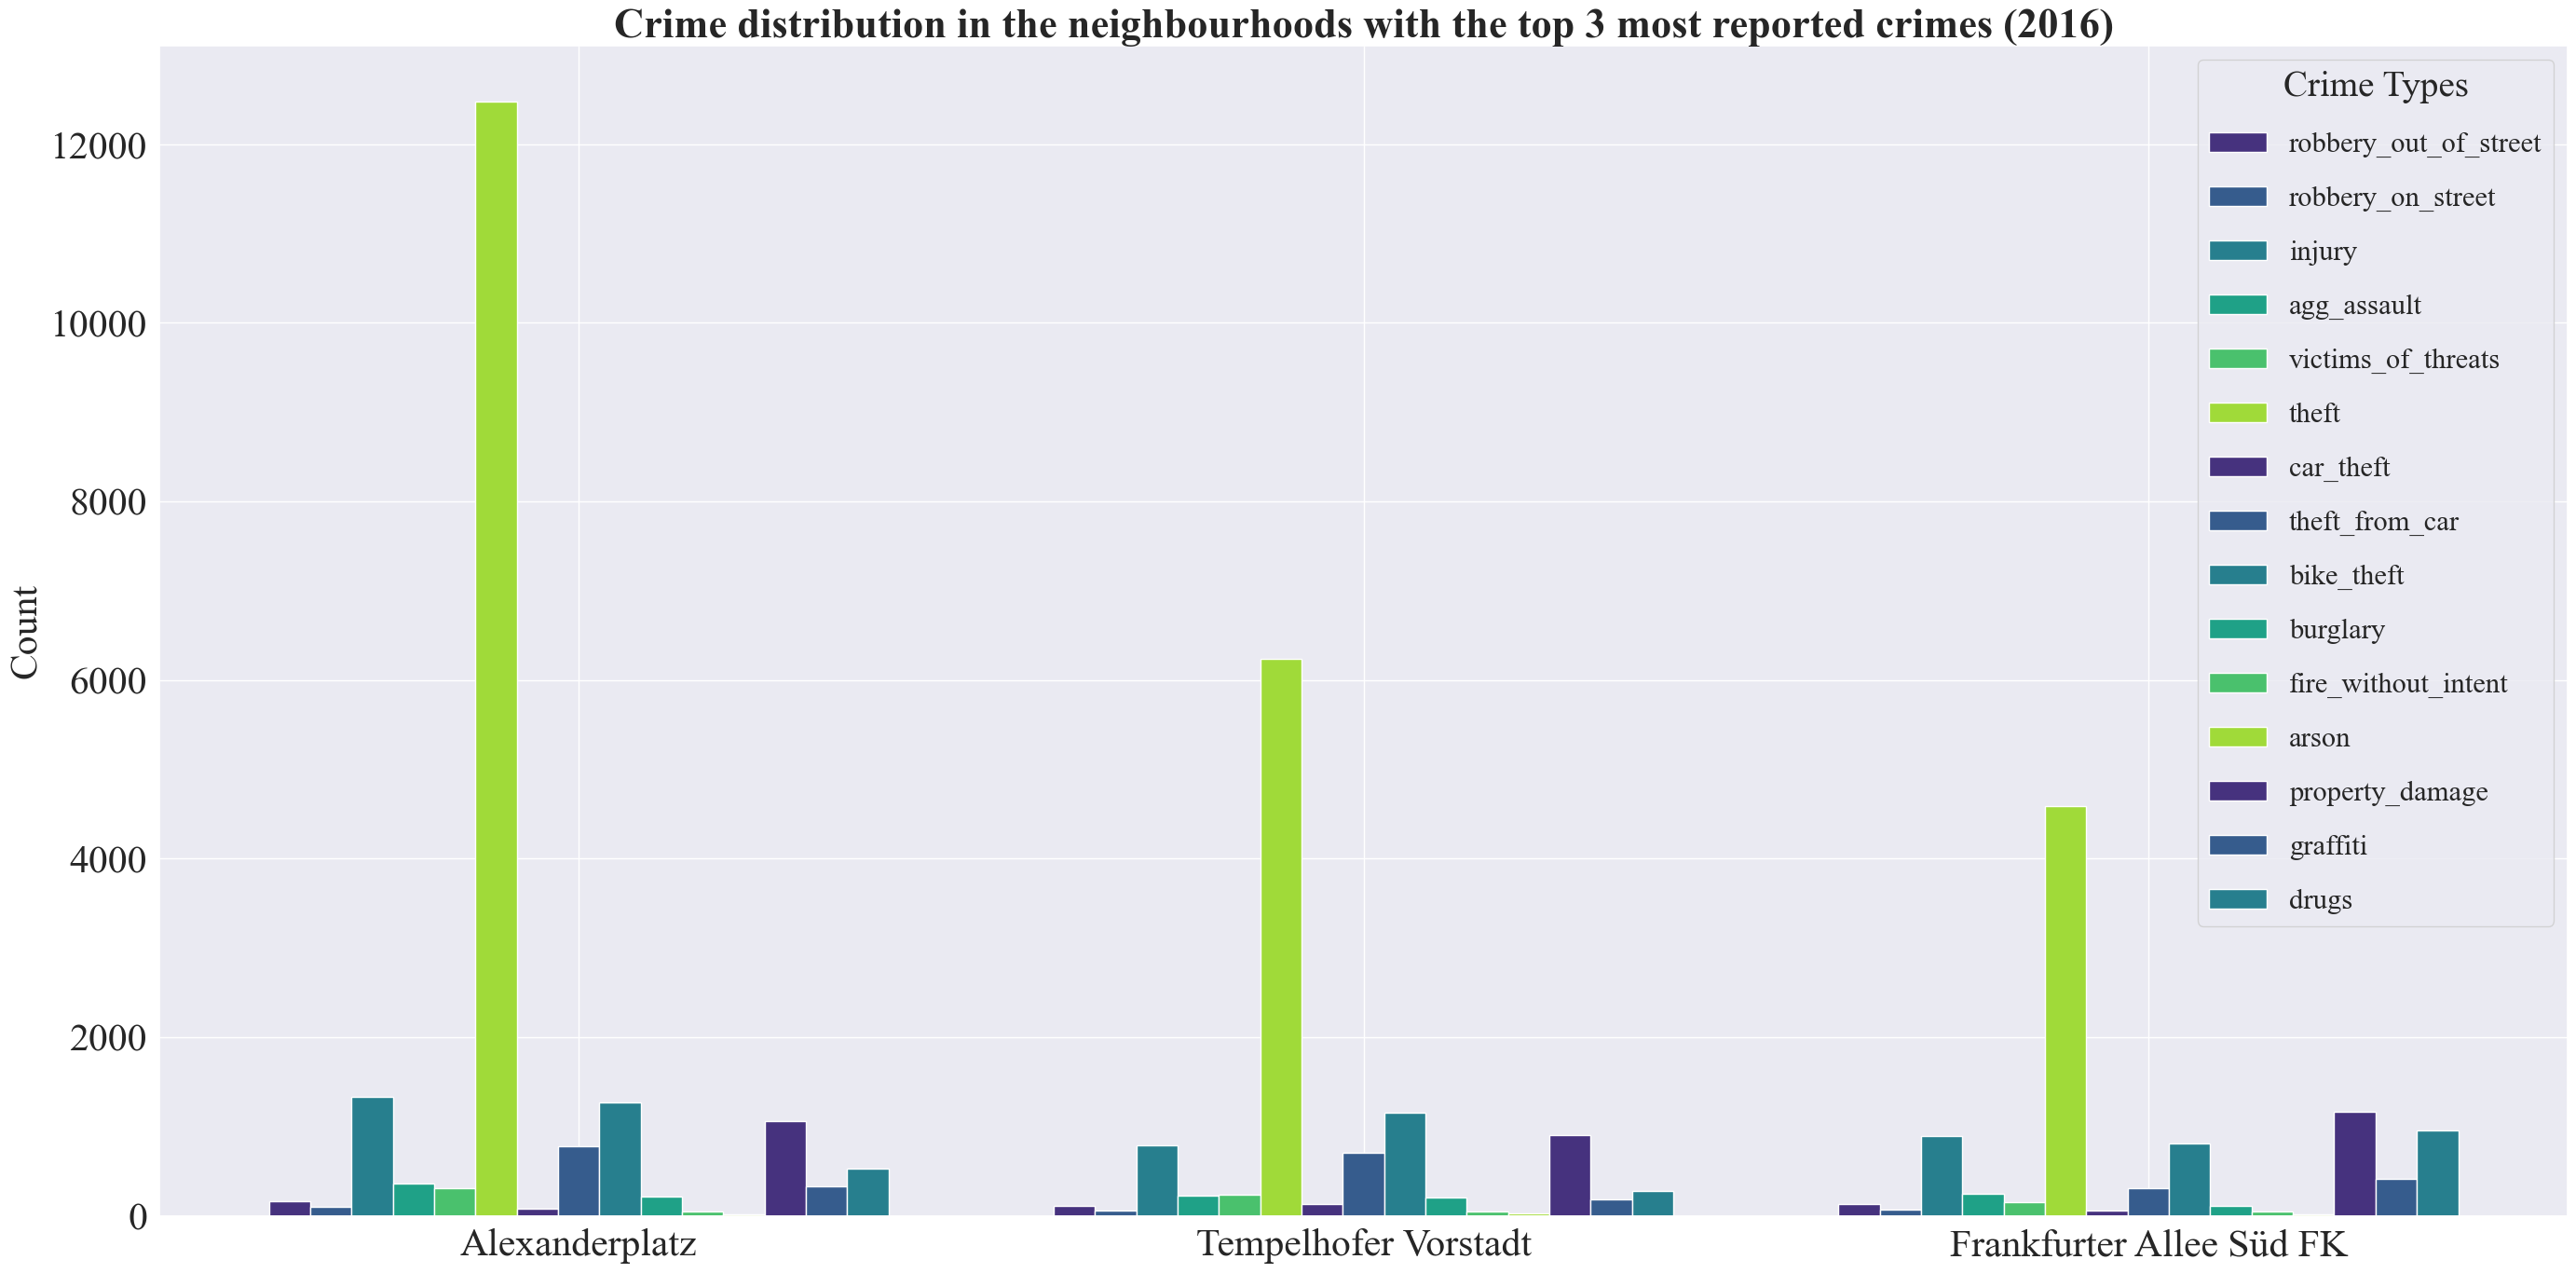

In [25]:
plot_crime_distribution(2016)
plt.show()

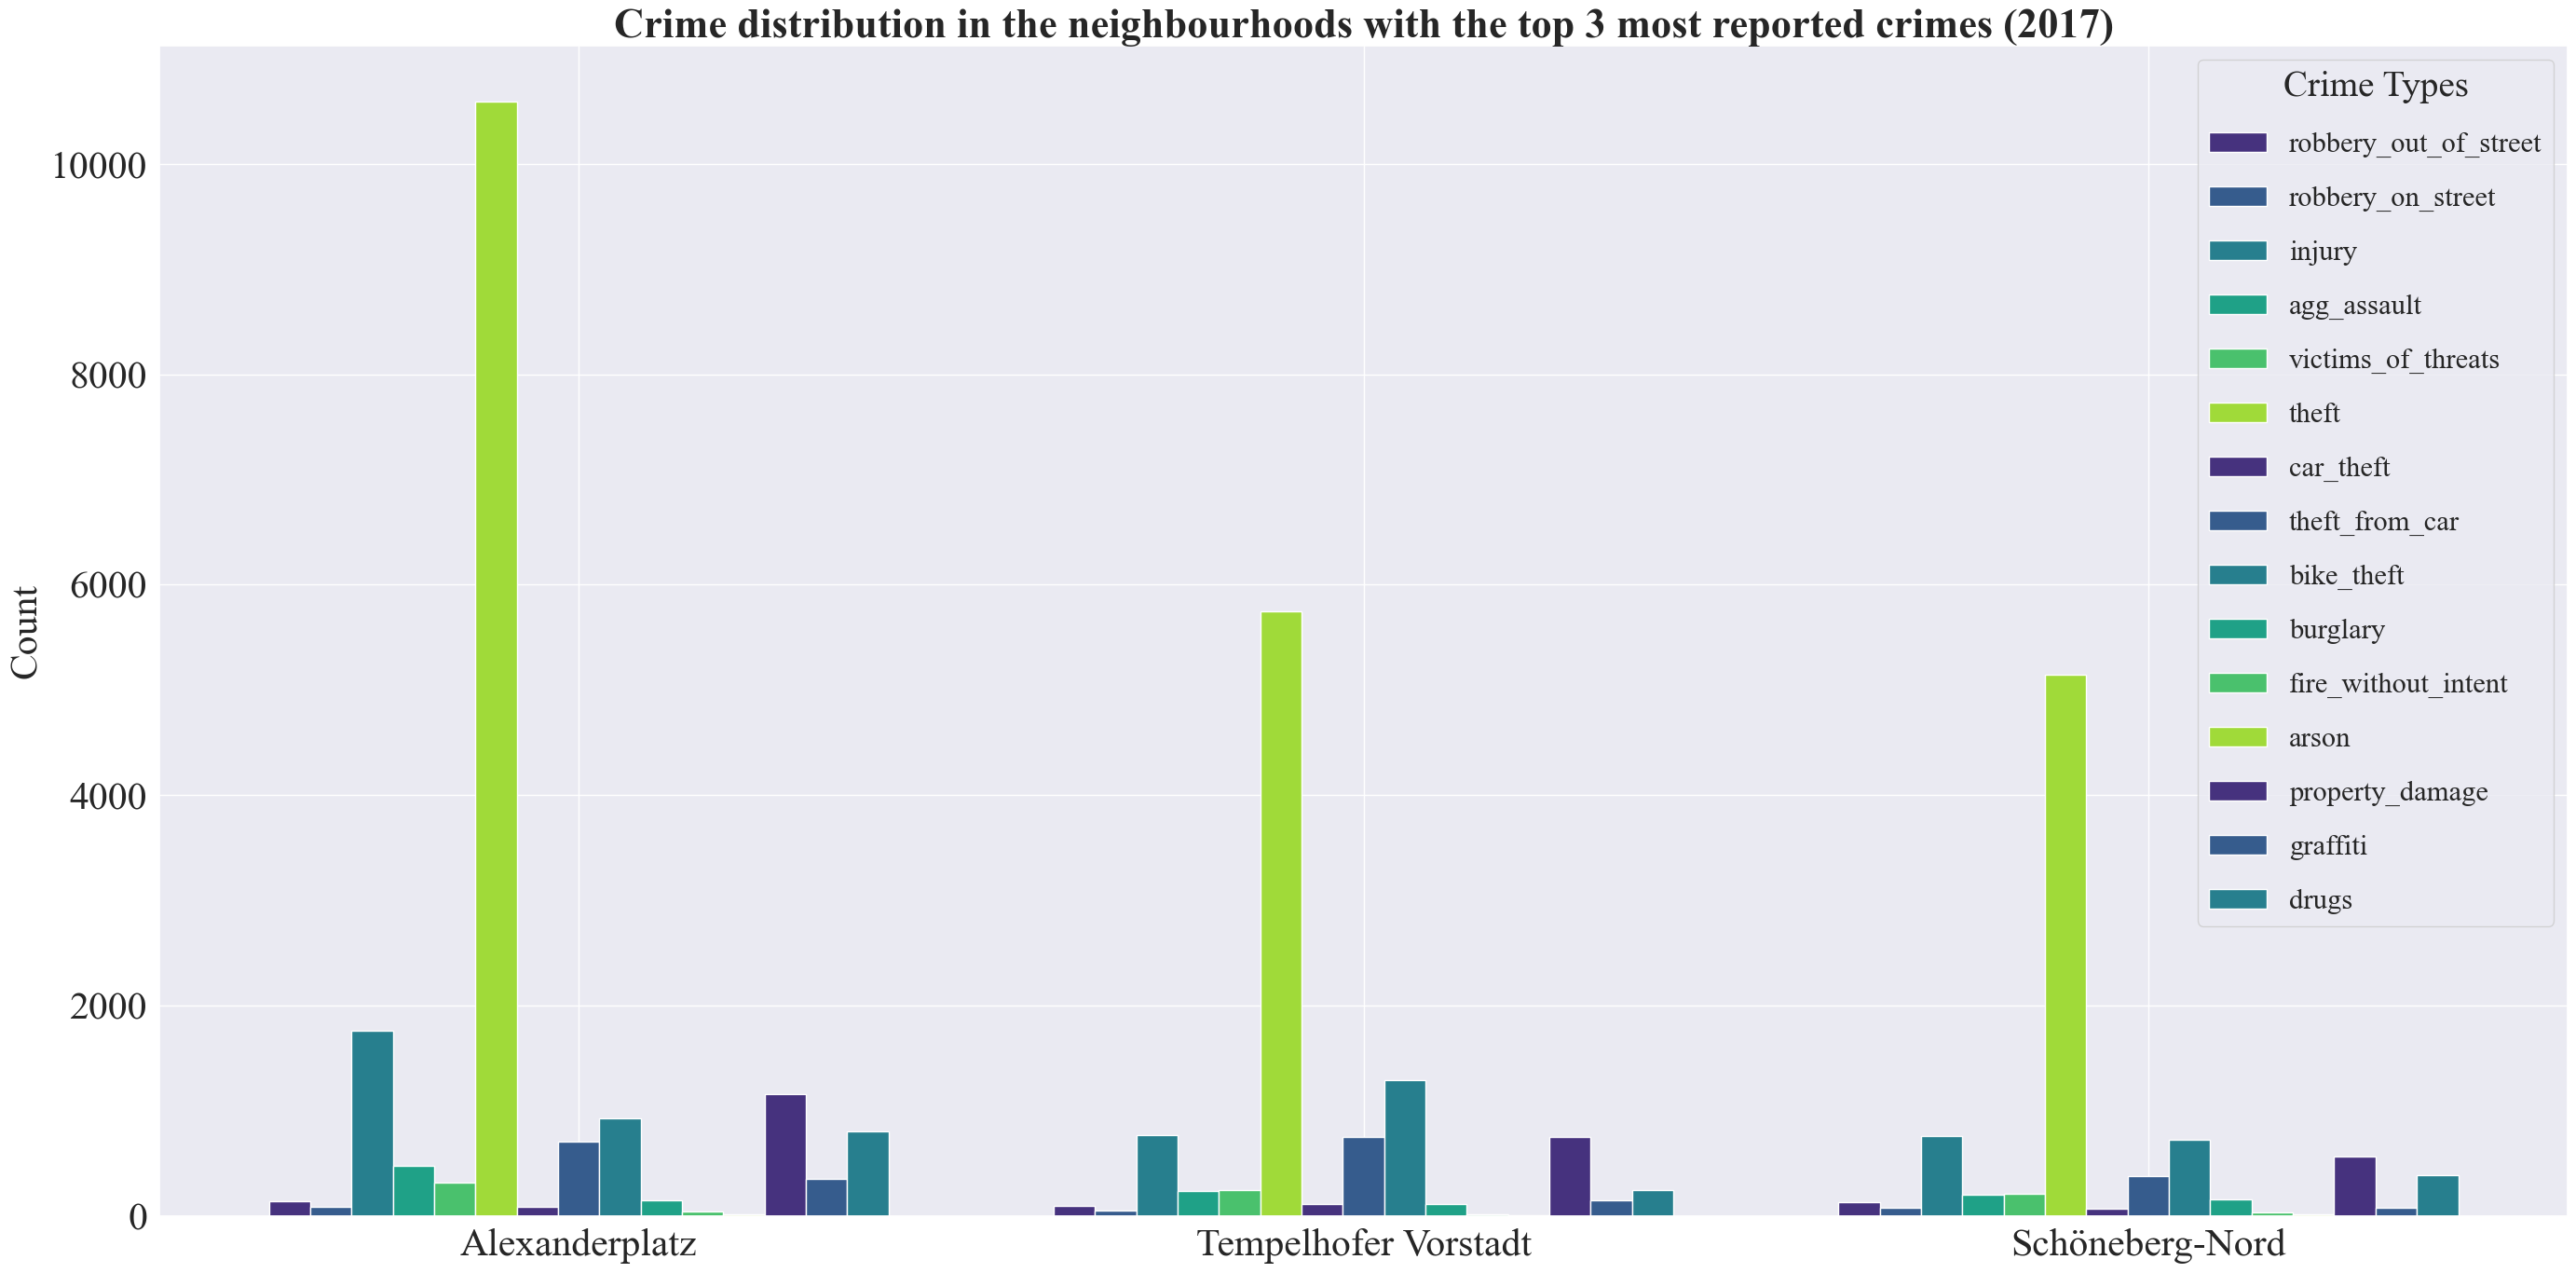

In [26]:
plot_crime_distribution(2017)
plt.show()

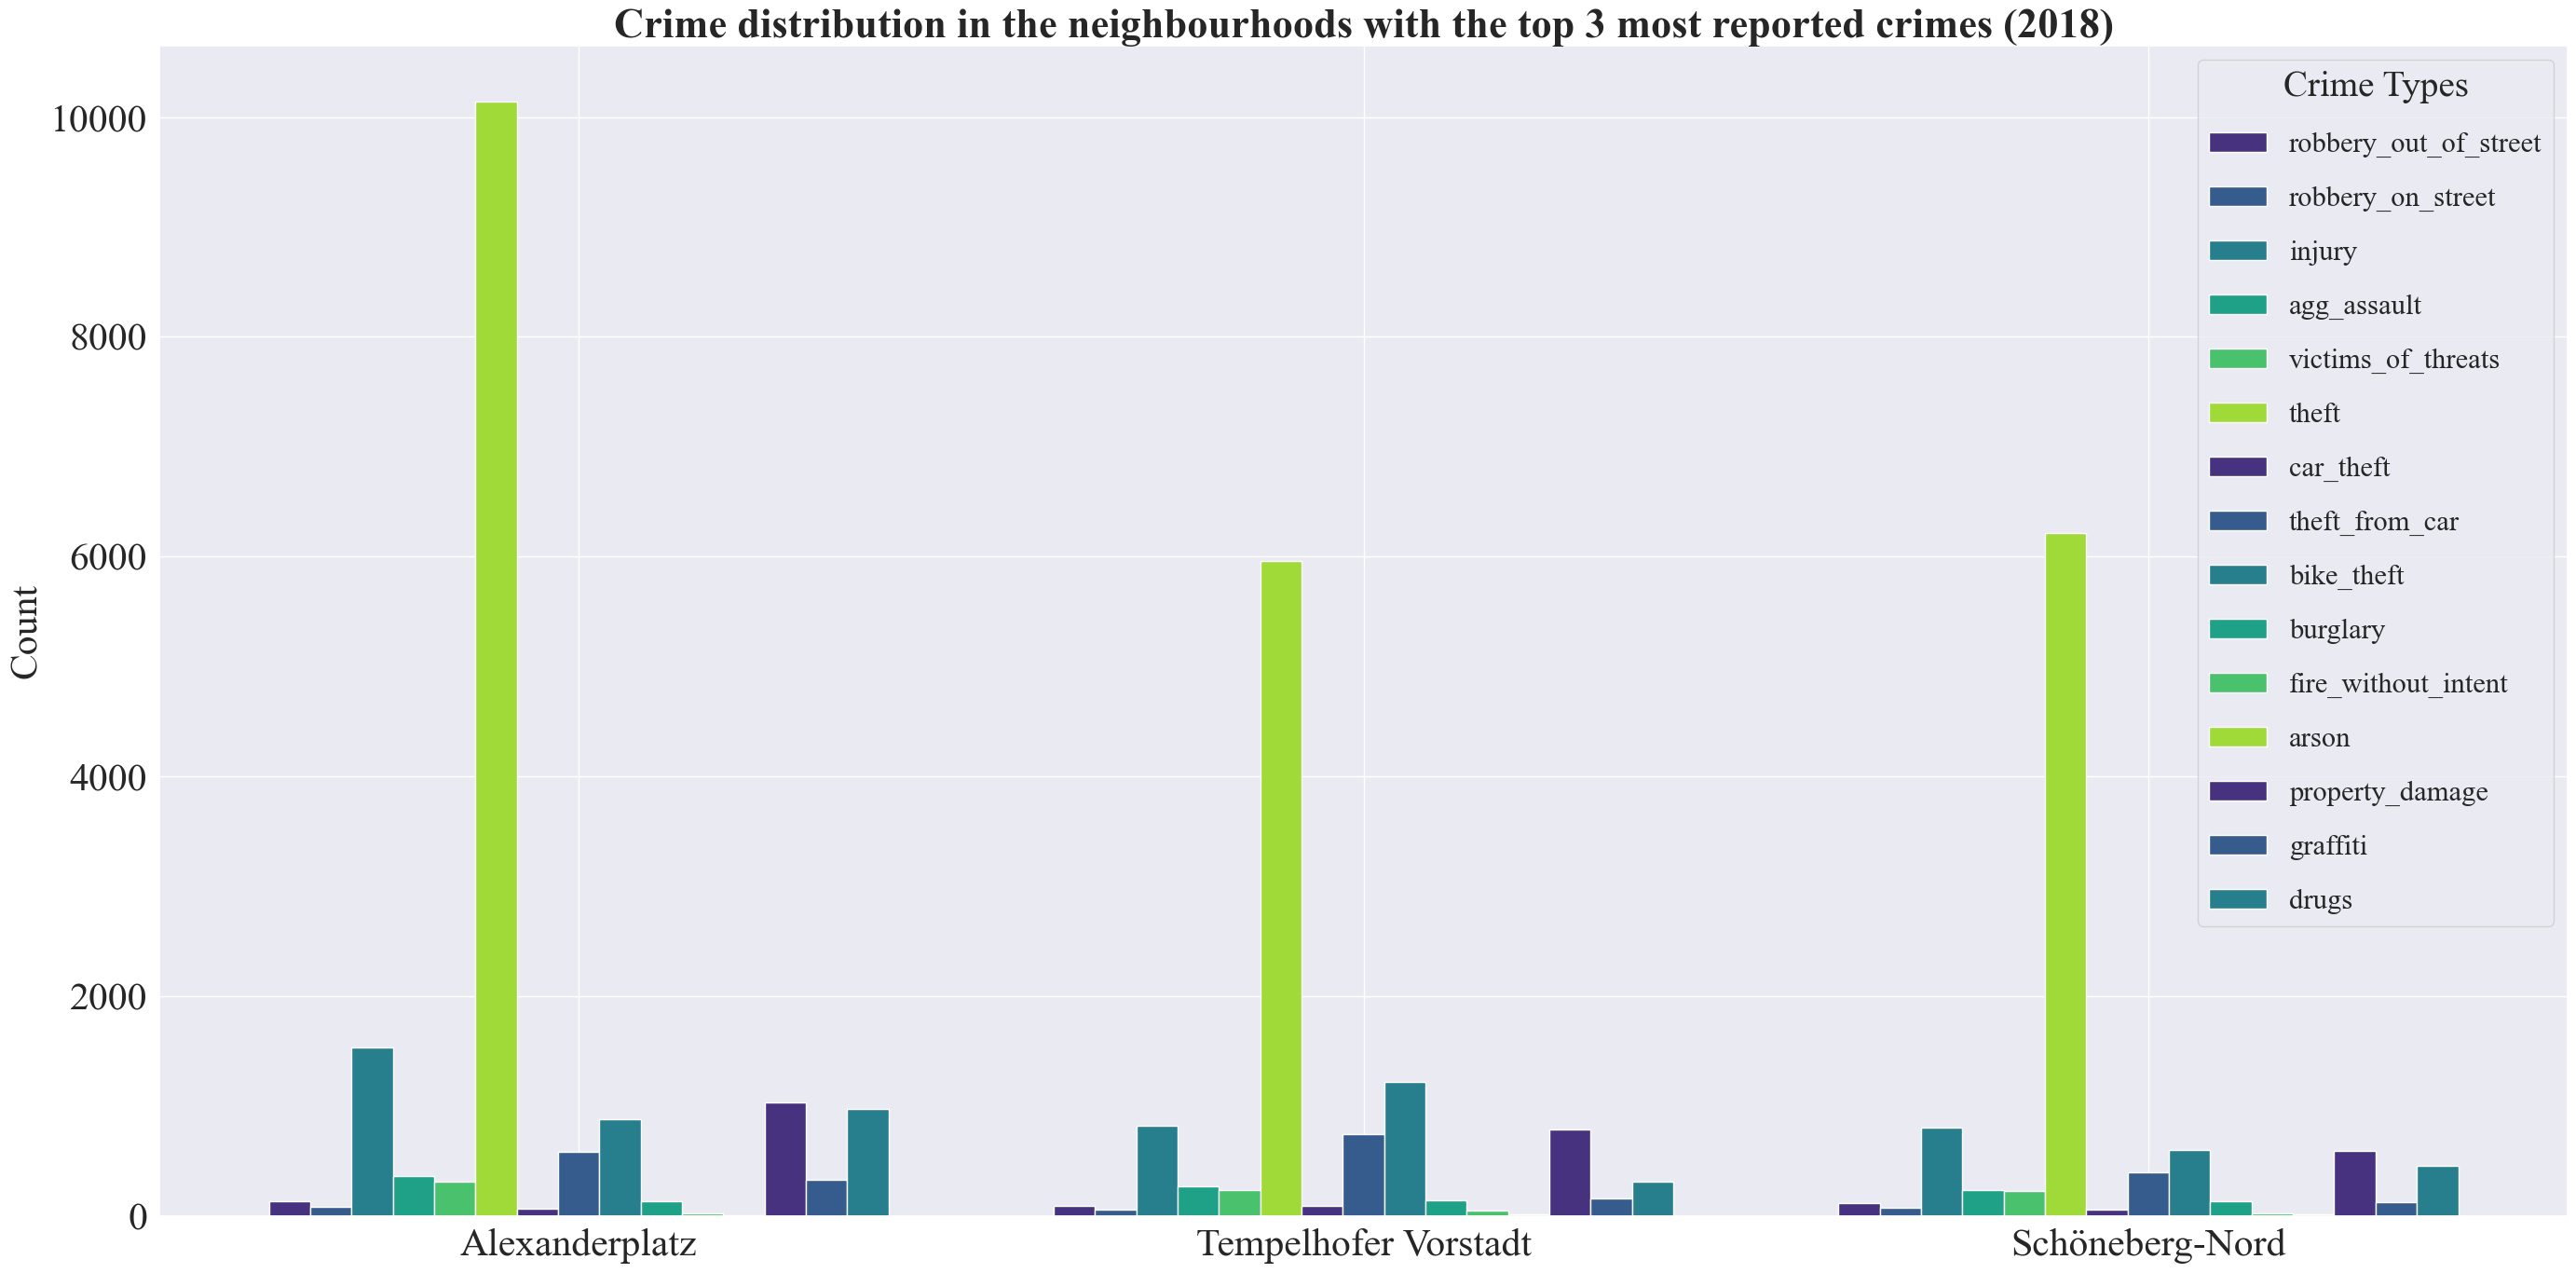

In [27]:
plot_crime_distribution(2018)
plt.show()

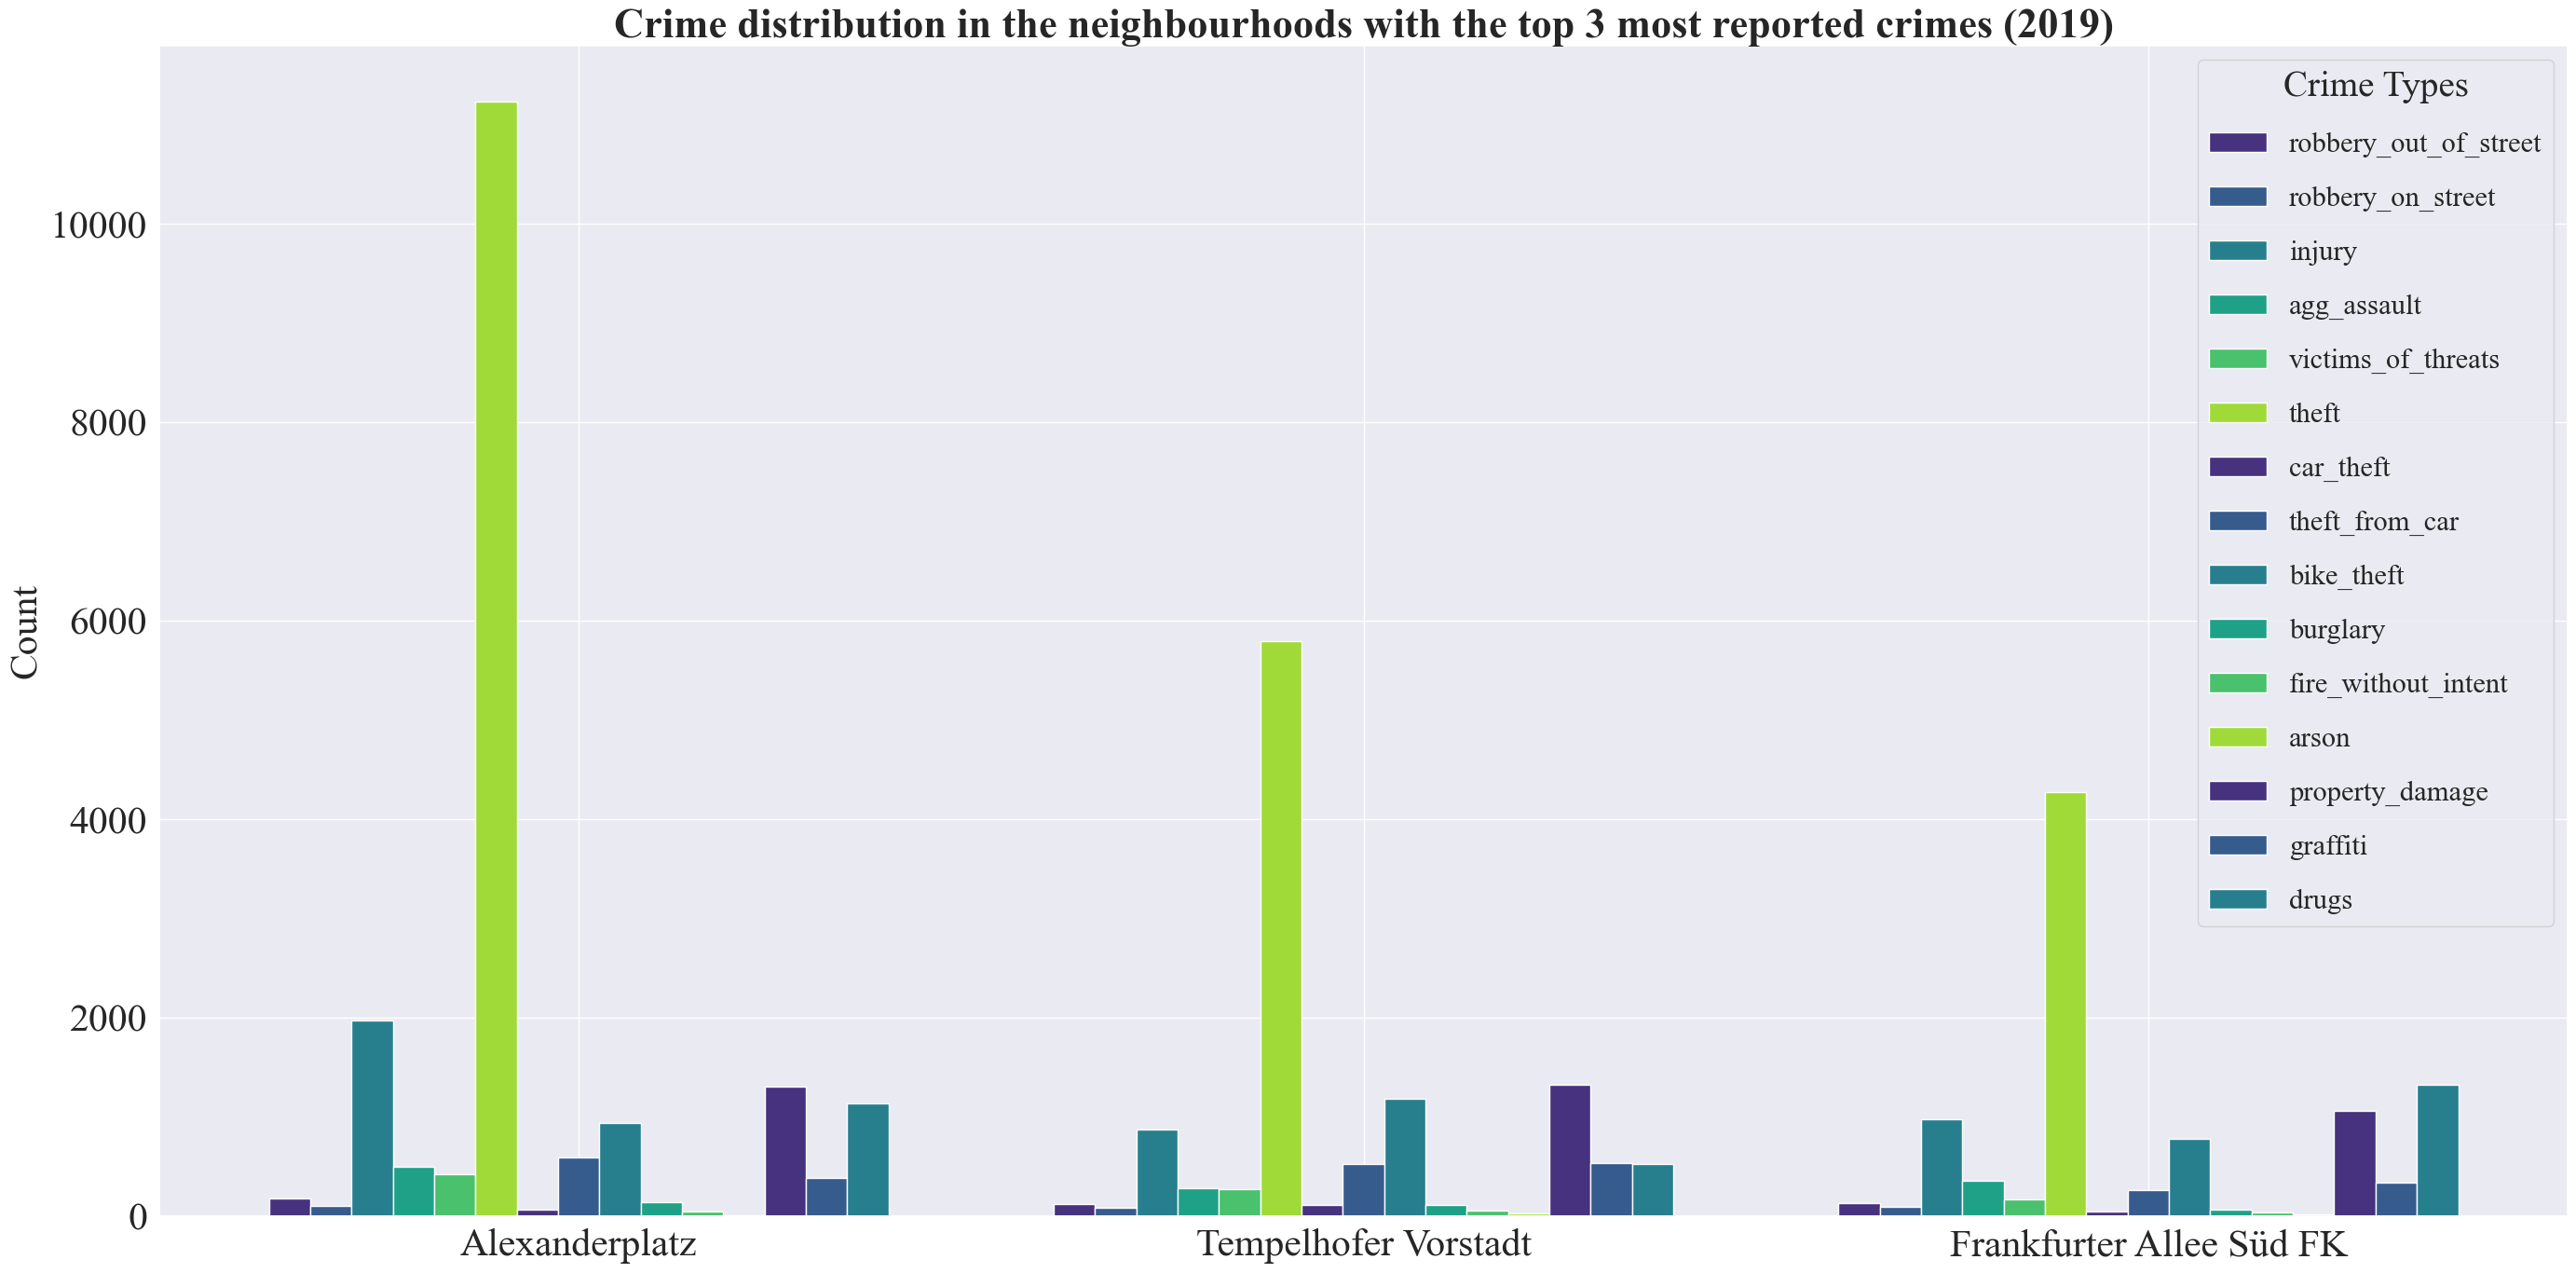

In [28]:
plot_crime_distribution(2019)
plt.show()

##### Noteworthy observations
- There is a common pattern amongst the neighbourhoods that are in the top 3 for reported crimes over the years. Apart from Wedding Zentrum, which is there once (in 2012), and Schöneberg Nord, which is there twice (in 2017 & 2018), the top 3 neighbourhoods with the highest amount of reported crimes are always Alexanderplatz, Tempelhofer Vorstadt and Frankfurter Allee Süd FK. Alexanderplatz being the top ranked neighbourhood every year.
- Theft is by far the crime comitted the most often and the number of reported cases of theft is significantly higher than any other crime. Theft is followed by injury, bike theft, and property damage as the other types of crimes with comparatively high number of reportings. 
- The types of crimes with comparatively the lowest number of reportings are arson, fire without intent and car theft.
- The observed patterns remain consistent across all the years.

#### 3. What are the general trends in the reoprted crimes from 2012 - 2019?

In this section I aim to find the the total number of reported crimes anually in Berlin. In order to do that, I will first group the dataframe by the years and execute a sum operation on the "total_crimes" column.

In [29]:
yearly_reportings = data_copy.groupby('year')['total_crimes'].sum().reset_index()
yearly_reportings

,year,total_crimes
0,2012,421316
1,2013,432195
2,2014,438522
3,2015,458215
4,2016,465907
5,2017,425151
6,2018,408125
7,2019,400171


In order to create this new dataframe, "yearly_reportings", I have had to use a copy of the dataframe from line 13. This was done because the dataframe, as it was in line 13, had been altered later on and this part of the project required the use of the unaltered version of that dataframe.

Now there exists a new dataframe with only the years and the total number of reportings oer year, which will now be used to make a plot to visualize the data. This can be seen below.

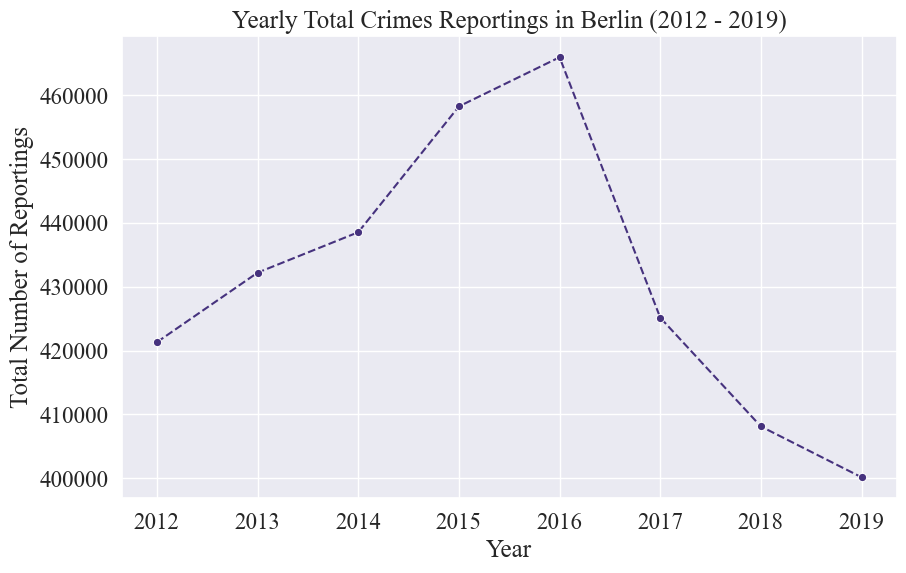

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_reportings, x='year', y='total_crimes', marker='o', linestyle='--');

plt.title('Yearly Total Crimes Reportings in Berlin (2012 - 2019)')
plt.xlabel('Year')
plt.ylabel('Total Number of Reportings')

plt.show()

I have created a line plot to represent the total anual reportings of crimes in Berlin. The line plot makes it possible to observe the trends in the data and see amount of total reportings per year. 

##### Noteworthy observations
- Between years, 2012 - 2016, there was a steady rise in the amount of reportings. This number peaked in 2016 with a value of 465907 reportings in that year.
- However, since then the reportings have followed a downwards trend, decreasing every year between 2017 - 2019. In 2019, with a total number reportings of 400171 criminal activities, the number has reached its lowest point throughout all the years included in this dataset.

### Conclusion

 - Neighbourhood with highest number of reported crimes throughout the years: Alexanderplatz.
 - Theft is the most commonly reported crime.
 - 2016 had the highest number of reportings (465907) and 2019 had the least (400171).
 - Overall, crime reportings have decreased from the start of the dataset till the end.